In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import csv 
from collections import defaultdict
import re

In [2]:
#17 pulse numbers in the data set -> they are imaginary so each number is represented by two attributes
#So we have 34 continuous predictor columns and a final column classifying if the data is 'good' or 'bad'

#here we build the headers
headers = []
for x in range(1,18):

  headers.append('real_val' +str(x))
  headers.append('complex_val' + str(x))

headers.append('classification')

#df is dataframe
df_ion = pd.read_csv('./IonosphereDataSet/ionosphere.data',header=None, names = headers)

# since there is no missing we can start looking at the data 

df_ion.head(10)

,real_val1,complex_val1,real_val2,complex_val2,real_val3,complex_val3,real_val4,complex_val4,real_val5,complex_val5,...,complex_val13,real_val14,complex_val14,real_val15,complex_val15,real_val16,complex_val16,real_val17,complex_val17,classification
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,g
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,g
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,b


In [3]:
#Analyze the data
df_ion.describe()

,real_val1,complex_val1,real_val2,complex_val2,real_val3,complex_val3,real_val4,complex_val4,real_val5,complex_val5,...,real_val13,complex_val13,real_val14,complex_val14,real_val15,complex_val15,real_val16,complex_val16,real_val17,complex_val17
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#plotting values of complex numbers on a couple 'good' sets
# plt.scatter(df_ion.iloc[0][:34:2], df_ion.iloc[0][1:34:2], color="green")
# plt.xlabel('real axis')
# plt.ylabel('imaginary axis')
# plt.title('complex numbers for good output 1')
# plt.show()


# plt.scatter(df_ion.iloc[2][:34:2], df_ion.iloc[2][1:34:2], color="green")
# plt.xlabel('real axis')
# plt.ylabel('imaginary axis')
# plt.title('complex numbers for good output 2')
# plt.show()

# plt.scatter(df_ion.iloc[4][:34:2], df_ion.iloc[4][1:34:2], color="green")
# plt.xlabel('real axis')
# plt.ylabel('imaginary axis')
# plt.title('complex numbers for good output 3')
# plt.show()


In [5]:
#plotting the values of some of the bad sets 

# plt.scatter(df_ion.iloc[1][:34:2], df_ion.iloc[0][1:34:2], color="red")
# plt.xlabel('real axis')
# plt.ylabel('imaginary axis')
# plt.title('complex numbers for bad output 1')
# plt.show()


# plt.scatter(df_ion.iloc[3][:34:2], df_ion.iloc[2][1:34:2], color="red")
# plt.xlabel('real axis')
# plt.ylabel('imaginary axis')
# plt.title('complex numbers for bad output 2')
# plt.show()

# plt.scatter(df_ion.iloc[5][:34:2], df_ion.iloc[4][1:34:2], color="red")
# plt.xlabel('real axis')
# plt.ylabel('imaginary axis')
# plt.title('complex numbers for bad output 3')
# plt.show()

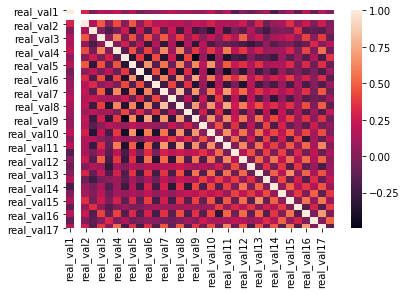

In [6]:
#Checking if features are correlated
corr = df_ion.corr()
sns.heatmap(corr)

#No group of inputs are very correlated 


In [7]:
print(df_ion['classification'].value_counts(normalize=True,dropna = True , ascending = True))

b    0.358974
g    0.641026
Name: classification, dtype: float64


In [8]:
df_ion['classification'] = df_ion['classification'].apply(lambda x: 1 if (x=='g') else 0)

In [9]:
df_ion.head(10)

,real_val1,complex_val1,real_val2,complex_val2,real_val3,complex_val3,real_val4,complex_val4,real_val5,complex_val5,...,complex_val13,real_val14,complex_val14,real_val15,complex_val15,real_val16,complex_val16,real_val17,complex_val17,classification
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,1
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,1
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,0


<h2> BCW Dataset </h2>

In [10]:
# Reading dataset into a dataframe
df_bcw = pd.read_csv('./BCW Data Set/breast-cancer-wisconsin.data', index_col = False, header=None, names=['id Number', 'Clump Thincknes', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli','Mitoses', 'Class'])

# Replacing the missing values with NaNs and finding missing values
df_bcw.replace(' ?', np.nan, inplace=True)

#dropping rows with missing values
df_bcw.dropna()


,id Number,Clump Thincknes,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [11]:
#Id number is not clearly not relavant so it is dropped
df_bcw.drop(['id Number'] , inplace=True, axis = 1)

In [12]:
df_bcw.describe()

#makes sense

,Clump Thincknes,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


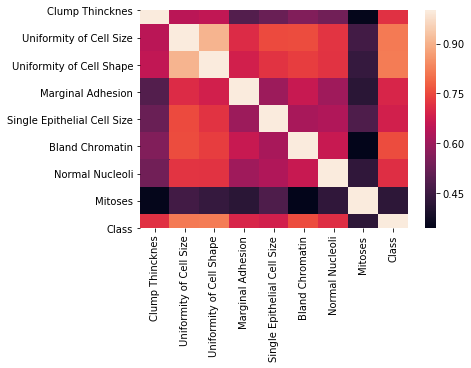

In [13]:
#check for correlations
bcw_corr = df_bcw.corr()
sns.heatmap(bcw_corr)

In [14]:
#Uniformity in cell size and uniformity in cell shape are clearly correlated 
#so one should be dropped 
df_bcw.drop(['Uniformity of Cell Size'] , inplace=True, axis = 1)

In [15]:
#2 if benign and 4 for malignant 
print(df_bcw.head(20))
df_bcw['Class'] = df_bcw['Class'].apply(lambda x: 0 if (x == 2) else 1)
#df_bcw['Class'] = df_bcw['Class'].apply(lambda x: print(type(x)))

df_bcw.head(20)

    Clump Thincknes  Uniformity of Cell Shape  Marginal Adhesion  \
0                 5                         1                  1   
1                 5                         4                  5   
2                 3                         1                  1   
3                 6                         8                  1   
4                 4                         1                  3   
5                 8                        10                  8   
6                 1                         1                  1   
7                 2                         2                  1   
8                 2                         1                  1   
9                 4                         1                  1   
10                1                         1                  1   
11                2                         1                  1   
12                5                         3                  3   
13                1                         1   

,Clump Thincknes,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,2,1,3,1,1,0
1,5,4,5,7,10,3,2,1,0
2,3,1,1,2,2,3,1,1,0
3,6,8,1,3,4,3,7,1,0
4,4,1,3,2,1,3,1,1,0
5,8,10,8,7,10,9,7,1,1
6,1,1,1,2,10,3,1,1,0
7,2,2,1,2,1,3,1,1,0
8,2,1,1,2,1,1,1,5,0
9,4,1,1,2,1,2,1,1,0


In [16]:
df_bcw.head(10)

,Clump Thincknes,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,2,1,3,1,1,0
1,5,4,5,7,10,3,2,1,0
2,3,1,1,2,2,3,1,1,0
3,6,8,1,3,4,3,7,1,0
4,4,1,3,2,1,3,1,1,0
5,8,10,8,7,10,9,7,1,1
6,1,1,1,2,10,3,1,1,0
7,2,2,1,2,1,3,1,1,0
8,2,1,1,2,1,1,1,5,0
9,4,1,1,2,1,2,1,1,0
